<a href="https://colab.research.google.com/github/shawonsaha15/Diabetes_ML_Research/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [ ]:
file_path = "/content/drive/MyDrive/Datasets/Type 2 Diabetes.csv"

# Load the dataset
df = pd.read_csv(file_path)

In [7]:
# Duplicates
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

# Remove duplicate rows
df = df.drop_duplicates(keep='first').reset_index(drop=True)
print(f"Duplicates removed. New shape: {df.shape}")

Number of duplicate rows: 0
Duplicates removed. New shape: (6499, 22)


In [8]:
# Basic info
print("===== Basic Dataset Info =====")
display(df.info())
print("\n===== Descriptive Statistics =====")
display(df.describe(include='all').transpose())

===== Basic Dataset Info =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6499 entries, 0 to 6498
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   varId            6499 non-null   object 
 1   alt              6499 non-null   object 
 2   ancestry         6499 non-null   object 
 3   beta             6499 non-null   float64
 4   chromosome       6499 non-null   object 
 5   dataset          6499 non-null   object 
 6   eaf              6499 non-null   float64
 7   maf              6499 non-null   float64
 8   multiAllelic     6499 non-null   bool   
 9   n                6499 non-null   float64
 10  pValue           6499 non-null   float64
 11  phenotype        6499 non-null   object 
 12  position         6499 non-null   int64  
 13  reference        6499 non-null   object 
 14  stdErr           6499 non-null   float64
 15  unscaled_beta    6499 non-null   float64
 16  unscaled_stdErr  6499 non-nul

None


===== Descriptive Statistics =====


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
varId,6499,3860,10:114758349:C:T,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
alt,6499,17,A,1726,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ancestry,6499,5,EU,4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
beta,6499.0,NaN,NaN,NaN,0.005096,1.387343,-36.4455,-0.119372,0.0875,0.185222,49.2388
chromosome,6499,23,6,1426,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dataset,6499,8,Mansour2021_DiabetesSubtypes_EU,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
eaf,6499.0,NaN,NaN,NaN,0.482267,0.24861,0.0066,0.27885,0.4477,0.646321,0.999925
maf,6499.0,NaN,NaN,NaN,0.287966,0.130982,0.000076,0.193558,0.305942,0.401489,0.5
multiAllelic,6499,1,False,6499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
n,6499.0,NaN,NaN,NaN,65007.114918,80300.889806,1552.3004,5602.5576,44692.895,75632.37,254373.33


In [9]:
# Show missing value summary only for columns with missing values
missing_summary = df.isnull().sum()
missing_summary = missing_summary[missing_summary > 0].sort_values(ascending=False)

print("===== Missing Values per Column (only columns with missing data) =====")
display(missing_summary)

# Define threshold — drop columns with >30% missing data
threshold = 0.3  # 30%
missing_ratio = df.isnull().mean()
cols_to_drop = missing_ratio[missing_ratio > threshold].index.tolist()

# Drop high-missing columns
if cols_to_drop:
    df = df.drop(columns=cols_to_drop)
    print(f"Dropped columns with >30% missing values: {cols_to_drop}")
else:
    print("No columns exceeded 30% missing threshold.")


===== Missing Values per Column (only columns with missing data) =====


,0
minorAllele,141
dbSNP,23
consequence,7


No columns exceeded 30% missing threshold.


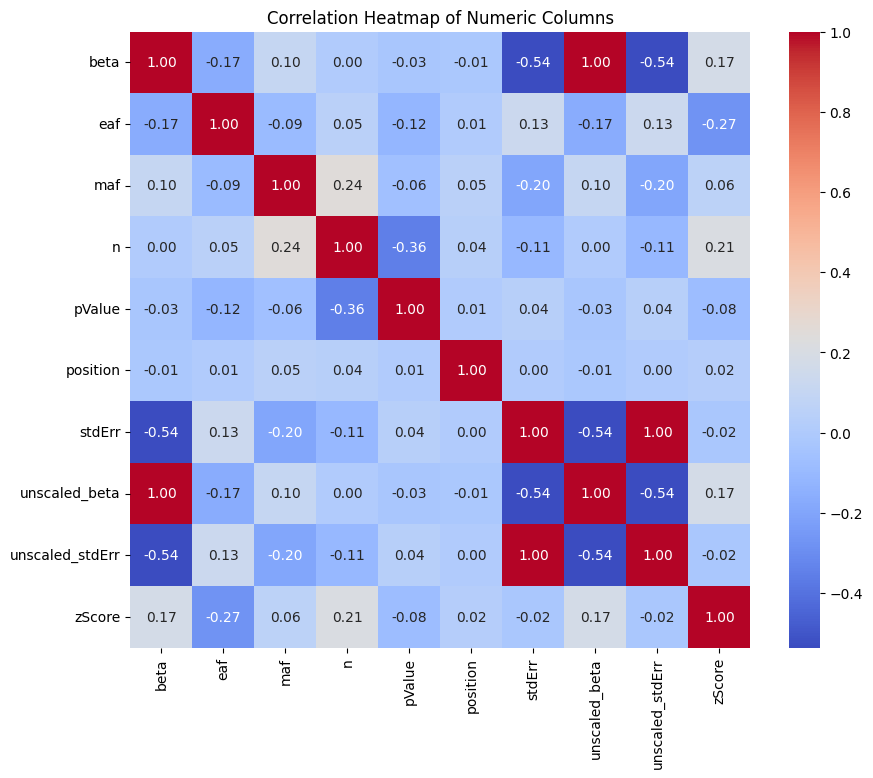

In [10]:
# Correlation heatmap
numeric_cols = df.select_dtypes(include=np.number).columns
corr = df[numeric_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Correlation Heatmap of Numeric Columns")
plt.show()

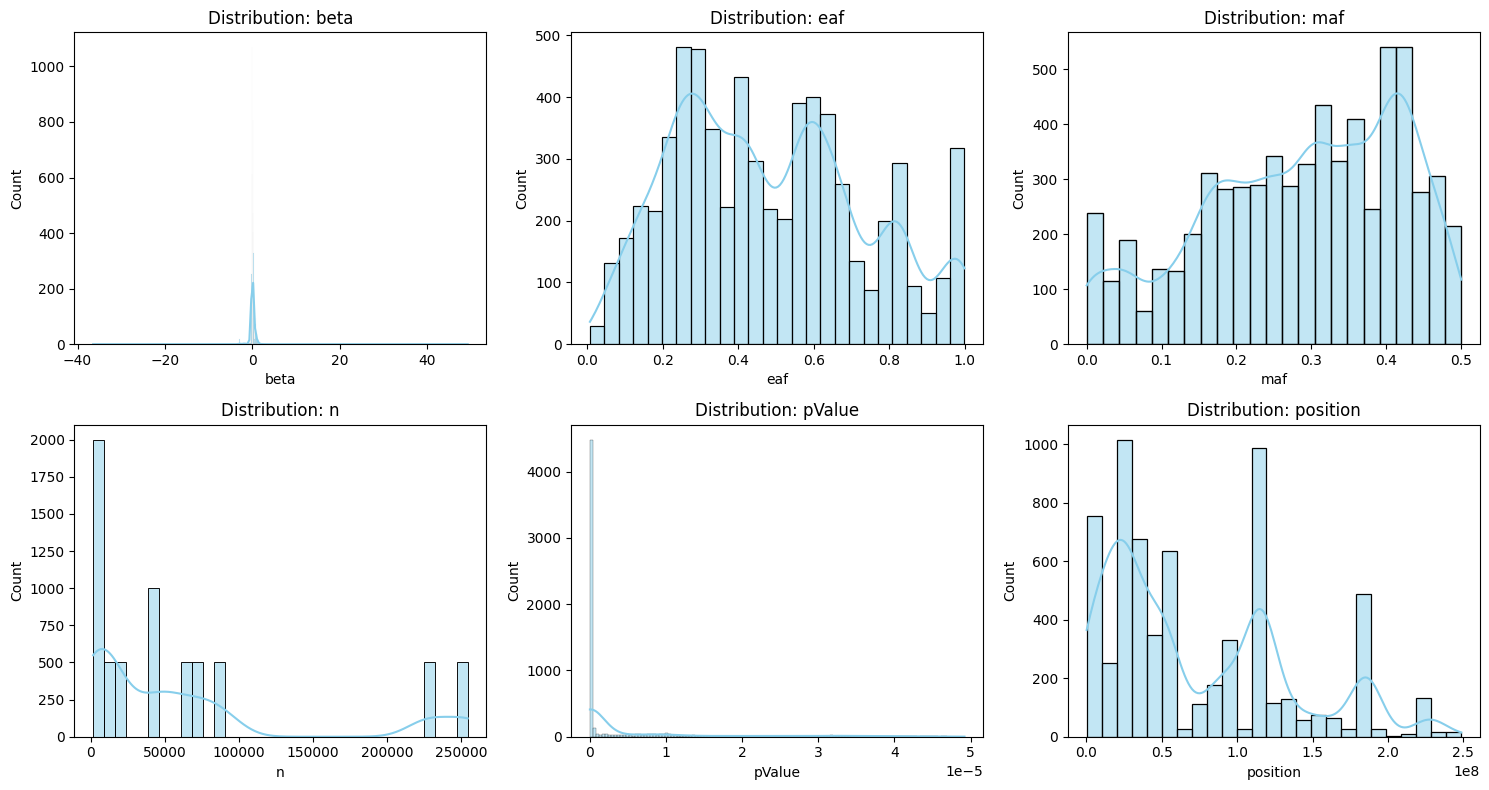

In [11]:
# Distribution plots (grouped)
cols_to_plot = numeric_cols[:min(6, len(numeric_cols))]  # limit for clarity
num_cols = len(cols_to_plot)
ncols = 3
nrows = int(np.ceil(num_cols / ncols))

fig, axes = plt.subplots(nrows, ncols, figsize=(15, 4*nrows))
axes = axes.flatten()
for i, col in enumerate(cols_to_plot):
    sns.histplot(df[col], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f"Distribution: {col}")
for j in range(i+1, len(axes)):
    axes[j].axis('off')
plt.tight_layout()
plt.show()

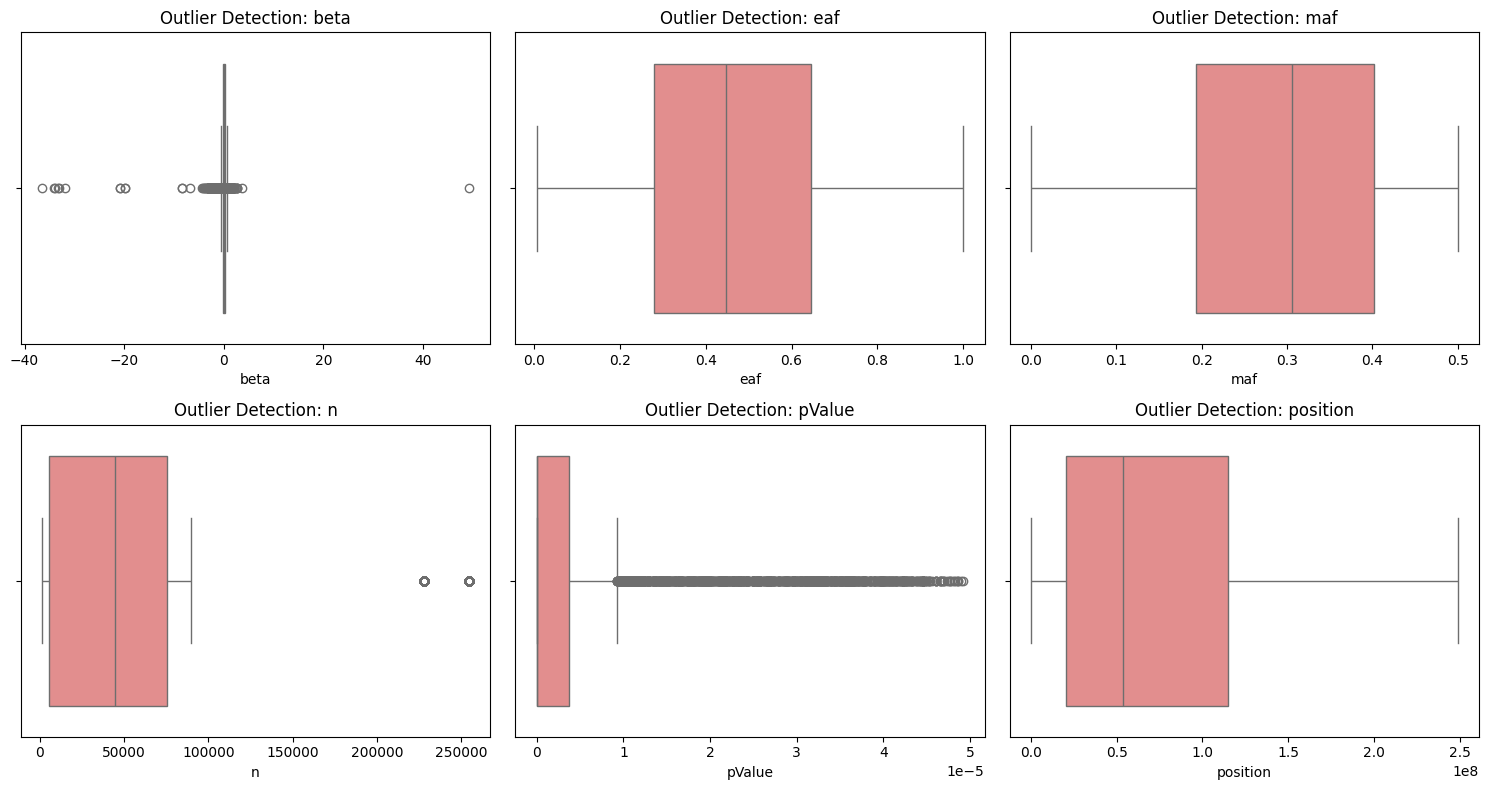

In [12]:
# Outlier boxplots (grouped)
fig, axes = plt.subplots(nrows, ncols, figsize=(15, 4*nrows))
axes = axes.flatten()
for i, col in enumerate(cols_to_plot):
    sns.boxplot(x=df[col], ax=axes[i], color='lightcoral')
    axes[i].set_title(f"Outlier Detection: {col}")
for j in range(i+1, len(axes)):
    axes[j].axis('off')
plt.tight_layout()
plt.show()

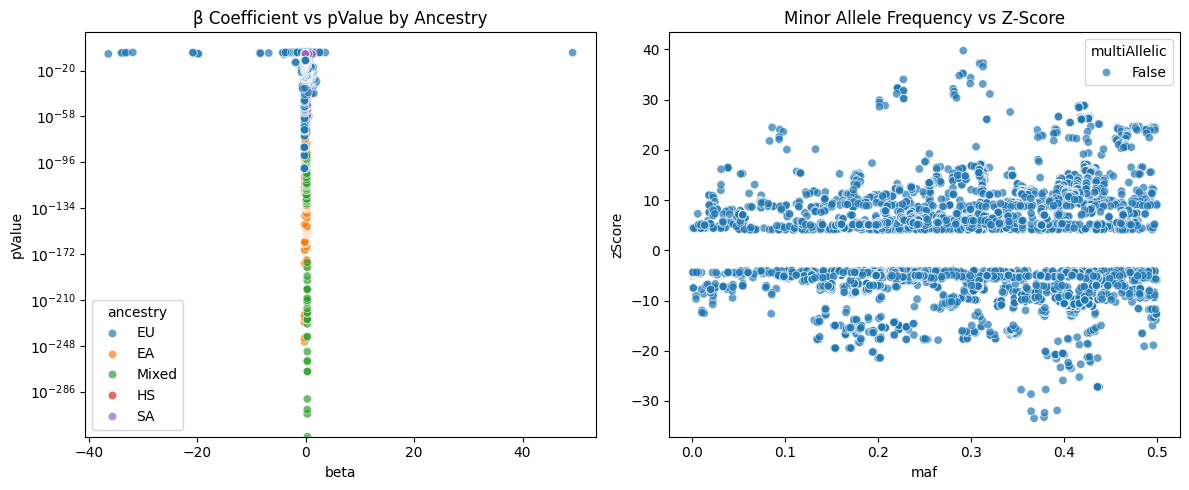

In [13]:
# Key relationships (combined multi-panel)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.scatterplot(data=df, x='beta', y='pValue', hue='ancestry', alpha=0.7, ax=axes[0])
axes[0].set_yscale('log')
axes[0].set_title("β Coefficient vs pValue by Ancestry")

sns.scatterplot(data=df, x='maf', y='zScore', hue='multiAllelic', alpha=0.7, ax=axes[1])
axes[1].set_title("Minor Allele Frequency vs Z-Score")
plt.tight_layout()
plt.show()

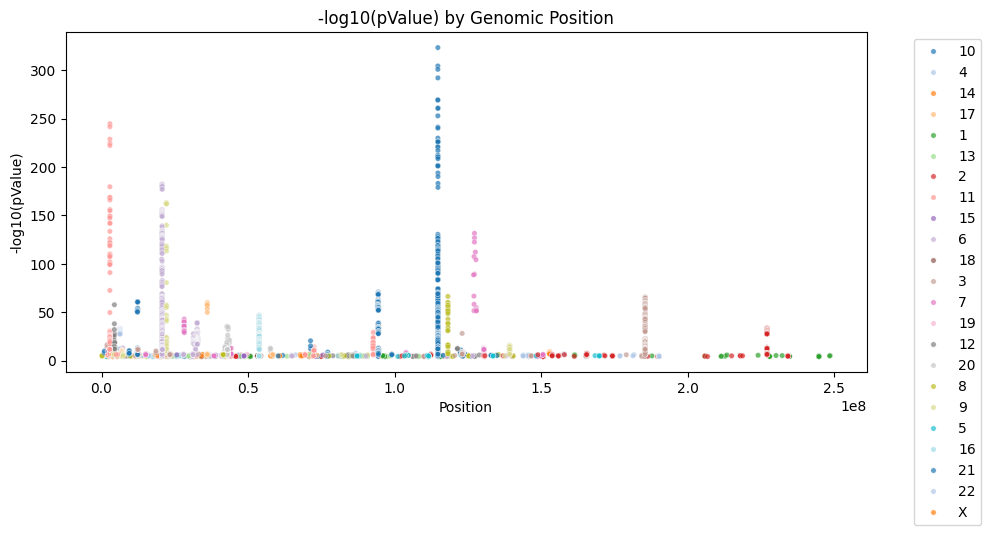

In [14]:
# pValue Manhattan-like plot
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='position', y=-np.log10(df['pValue']),
                hue='chromosome', s=15, alpha=0.7, palette='tab20')
plt.title('-log10(pValue) by Genomic Position')
plt.xlabel('Position')
plt.ylabel('-log10(pValue)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

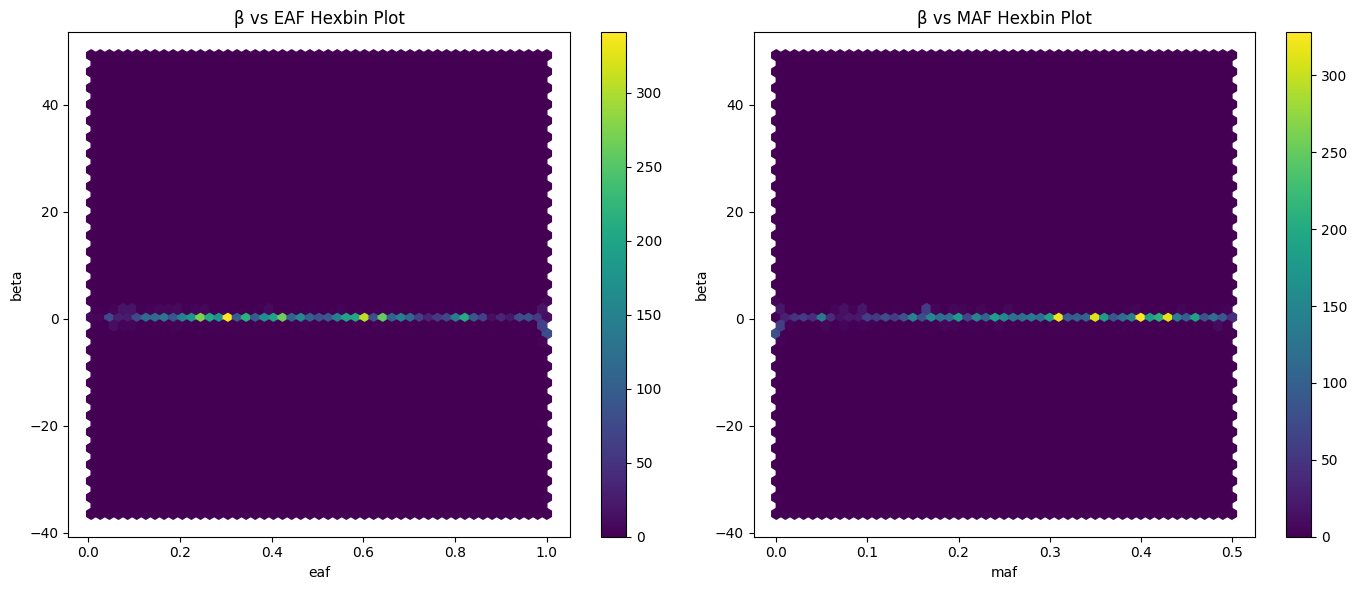

In [15]:
# β vs EAF/MAF joint relationship
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: β vs eaf
hb1 = axes[0].hexbin(df['eaf'], df['beta'], gridsize=50, cmap='viridis')
axes[0].set_xlabel('eaf')
axes[0].set_ylabel('beta')
axes[0].set_title('β vs EAF Hexbin Plot')
cb1 = fig.colorbar(hb1, ax=axes[0])

# Plot 2: β vs maf
hb2 = axes[1].hexbin(df['maf'], df['beta'], gridsize=50, cmap='viridis')
axes[1].set_xlabel('maf')
axes[1].set_ylabel('beta')
axes[1].set_title('β vs MAF Hexbin Plot')
cb2 = fig.colorbar(hb2, ax=axes[1])

plt.tight_layout()
plt.show()


In [16]:
# Find unique values of required biological categories
print("Phenotype: ", df['phenotype'].unique())
print("Ancestry: ", df['ancestry'].unique())

Phenotype:  ['T2D_age-related' 'T2D_insulin-deficient' 'T2D_obesity-related'
 'T2D_autoimmune' 'T2D' 'T2DadjBMI' 'T2D_preg' 'T2D_nopreg']
Ancestry:  ['EU' 'EA' 'Mixed' 'HS' 'SA']


In [17]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# --- Step 1: One-hot encode 'ancestry' ---
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
ancestry_encoded = ohe.fit_transform(df[['ancestry']])

# Create DataFrame with clear column names
ancestry_cols = [f"ancestry_{cat}" for cat in ohe.categories_[0]]
df_ancestry = pd.DataFrame(ancestry_encoded, columns=ancestry_cols, index=df.index)

# Merge back and drop original ancestry
df_encoded = pd.concat([df.drop(columns=['ancestry']), df_ancestry], axis=1)

# --- Step 2: Label encode 'phenotype' ---
le = LabelEncoder()
df_encoded['phenotype_label'] = le.fit_transform(df_encoded['phenotype'])


print("Ancestry columns added:", ancestry_cols)
print("\nPhenotype label mapping:")
for cls, lbl in zip(le.classes_, le.transform(le.classes_)):
    print(f"  {cls}  →  {lbl}")


Ancestry columns added: ['ancestry_EA', 'ancestry_EU', 'ancestry_HS', 'ancestry_Mixed', 'ancestry_SA']

Phenotype label mapping:
  T2D  →  0
  T2D_age-related  →  1
  T2D_autoimmune  →  2
  T2D_insulin-deficient  →  3
  T2D_nopreg  →  4
  T2D_obesity-related  →  5
  T2D_preg  →  6
  T2DadjBMI  →  7


## Random Forest

Train size: 4549, Validation size: 975, Test size: 975

=== Validation Set Results ===
Accuracy: 0.9723
                       precision    recall  f1-score   support

                  T2D       0.97      0.96      0.96       375
      T2D_age-related       1.00      1.00      1.00        75
       T2D_autoimmune       1.00      1.00      1.00        75
T2D_insulin-deficient       1.00      1.00      1.00        75
           T2D_nopreg       1.00      1.00      1.00        75
  T2D_obesity-related       1.00      1.00      1.00        75
             T2D_preg       1.00      1.00      1.00        75
            T2DadjBMI       0.90      0.93      0.91       150

             accuracy                           0.97       975
            macro avg       0.98      0.99      0.98       975
         weighted avg       0.97      0.97      0.97       975



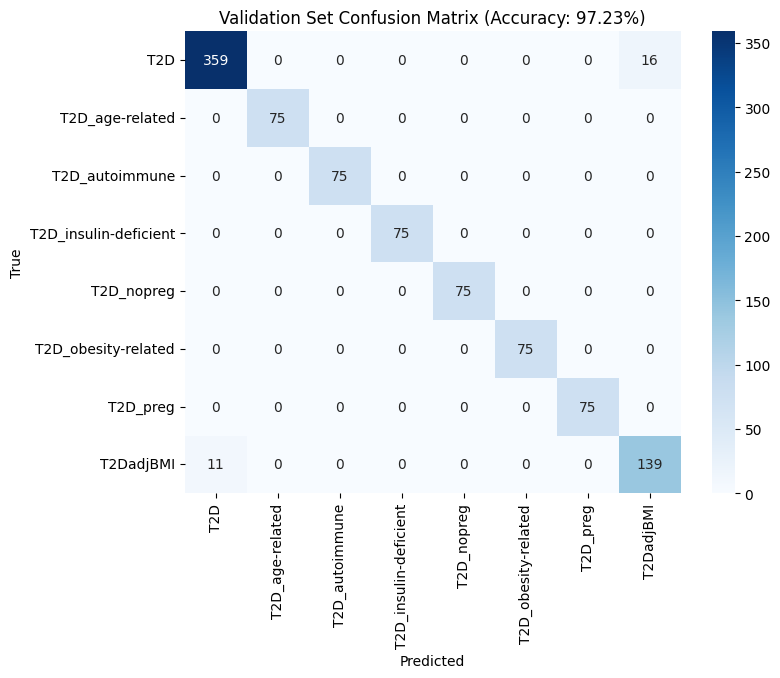


=== Test Set Results ===
Accuracy: 0.9764
                       precision    recall  f1-score   support

                  T2D       0.97      0.97      0.97       375
      T2D_age-related       1.00      1.00      1.00        75
       T2D_autoimmune       1.00      1.00      1.00        75
T2D_insulin-deficient       1.00      1.00      1.00        75
           T2D_nopreg       1.00      1.00      1.00        75
  T2D_obesity-related       1.00      1.00      1.00        75
             T2D_preg       1.00      1.00      1.00        75
            T2DadjBMI       0.93      0.91      0.92       150

             accuracy                           0.98       975
            macro avg       0.99      0.99      0.99       975
         weighted avg       0.98      0.98      0.98       975



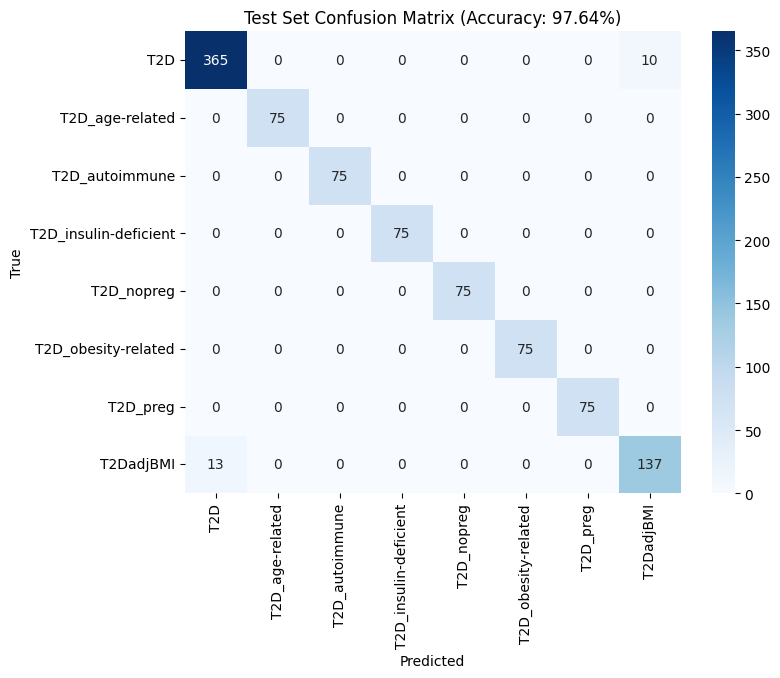

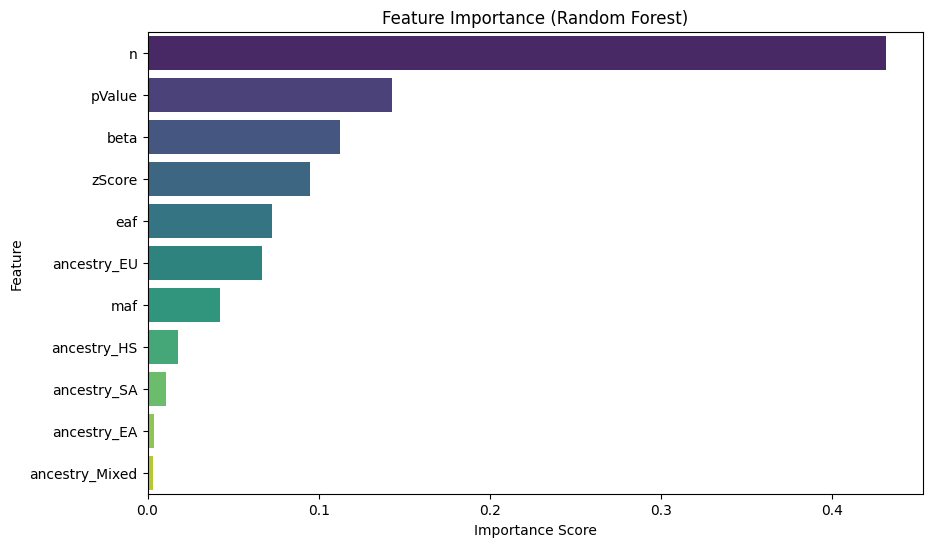

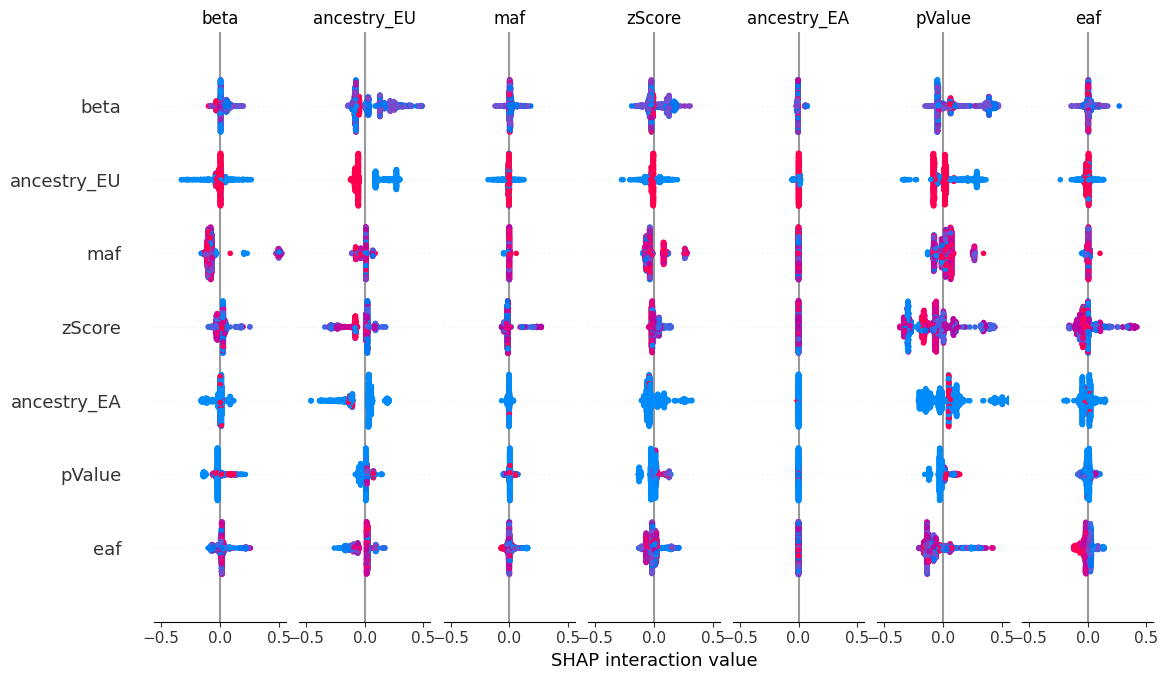

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# =====================================
# 1️⃣ Data Split (Keep your encoding part above this)
# =====================================
selected_features = [
    'beta', 'eaf', 'maf', 'pValue', 'zScore', 'n'
] + ancestry_cols  # ancestry_cols = your one-hot encoded ancestry columns

X = df_encoded[selected_features]
y = df_encoded['phenotype_label']

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)

print(f"Train size: {len(X_train)}, Validation size: {len(X_val)}, Test size: {len(X_test)}")

# =====================================
# 2️⃣ Train Random Forest (Single Fixed Model)
# =====================================
rf = RandomForestClassifier(
    n_estimators=300,
    class_weight="balanced_subsample",
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

# =====================================
# 3️⃣ Evaluate Function with Visualization
# =====================================
def evaluate_and_visualize(model, X, y, dataset_name="Dataset"):
    preds = model.predict(X)
    acc = accuracy_score(y, preds)

    print(f"\n=== {dataset_name} Results ===")
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y, preds, target_names=le.classes_))

    # Confusion Matrix
    cm = confusion_matrix(y, preds)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f"{dataset_name} Confusion Matrix (Accuracy: {acc:.2%})")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

# =====================================
# 4️⃣ Evaluate on Validation and Test
# =====================================
evaluate_and_visualize(rf, X_val, y_val, "Validation Set")
evaluate_and_visualize(rf, X_test, y_test, "Test Set")

# =====================================
# 5️⃣ Feature Importance Plot
# =====================================
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices], y=np.array(X.columns)[indices], palette="viridis")
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

# =====================================
# 6️⃣ Optional: SHAP Summary Plot
# =====================================
# Install SHAP first: pip install shap
try:
    import shap
    explainer = shap.TreeExplainer(rf)
    shap_values = explainer.shap_values(X_val)

    shap.summary_plot(shap_values, X_val, feature_names=X.columns, show=True)
except ImportError:
    print("SHAP not installed — skipping SHAP plot. Run `pip install shap` to enable it.")


#XgBoost

✅ XGBoost training completed!

=== Validation Set Results ===
Accuracy: 0.9723
                       precision    recall  f1-score   support

                  T2D       0.97      0.96      0.96       375
      T2D_age-related       1.00      1.00      1.00        75
       T2D_autoimmune       1.00      1.00      1.00        75
T2D_insulin-deficient       1.00      1.00      1.00        75
           T2D_nopreg       1.00      1.00      1.00        75
  T2D_obesity-related       1.00      1.00      1.00        75
             T2D_preg       1.00      1.00      1.00        75
            T2DadjBMI       0.90      0.93      0.91       150

             accuracy                           0.97       975
            macro avg       0.98      0.99      0.98       975
         weighted avg       0.97      0.97      0.97       975



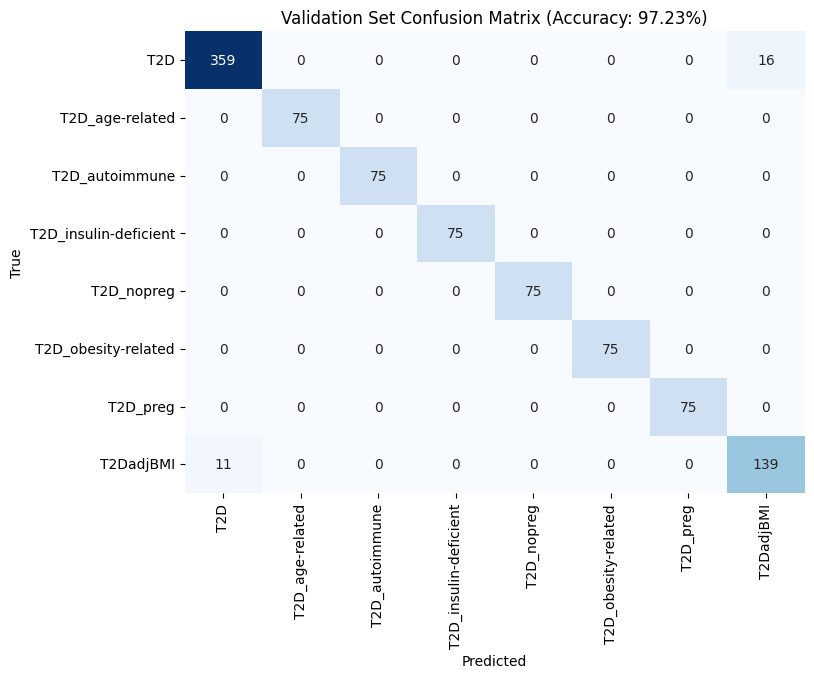

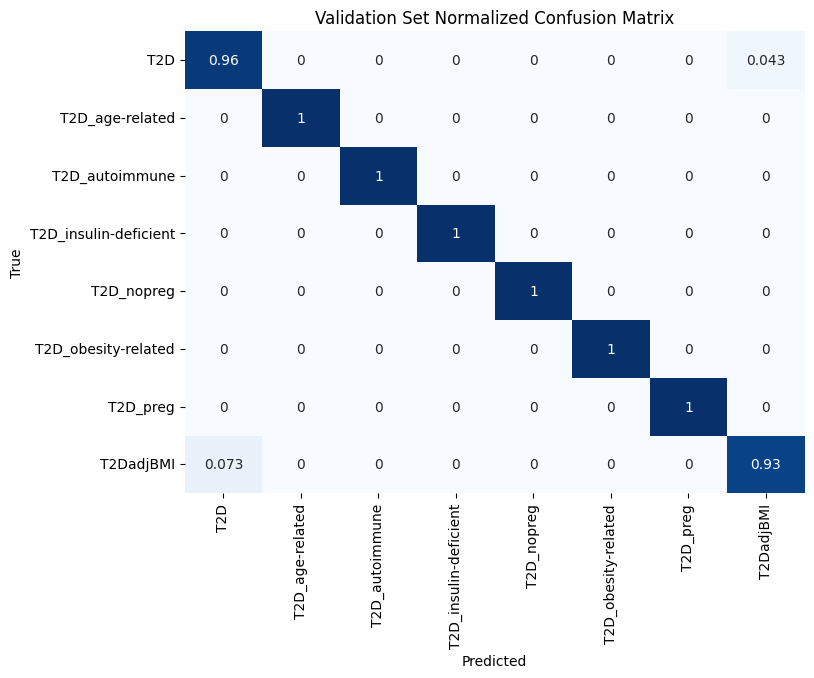


=== Test Set Results ===
Accuracy: 0.9795
                       precision    recall  f1-score   support

                  T2D       0.97      0.98      0.97       375
      T2D_age-related       1.00      1.00      1.00        75
       T2D_autoimmune       1.00      1.00      1.00        75
T2D_insulin-deficient       1.00      1.00      1.00        75
           T2D_nopreg       1.00      1.00      1.00        75
  T2D_obesity-related       1.00      1.00      1.00        75
             T2D_preg       1.00      1.00      1.00        75
            T2DadjBMI       0.94      0.93      0.93       150

             accuracy                           0.98       975
            macro avg       0.99      0.99      0.99       975
         weighted avg       0.98      0.98      0.98       975



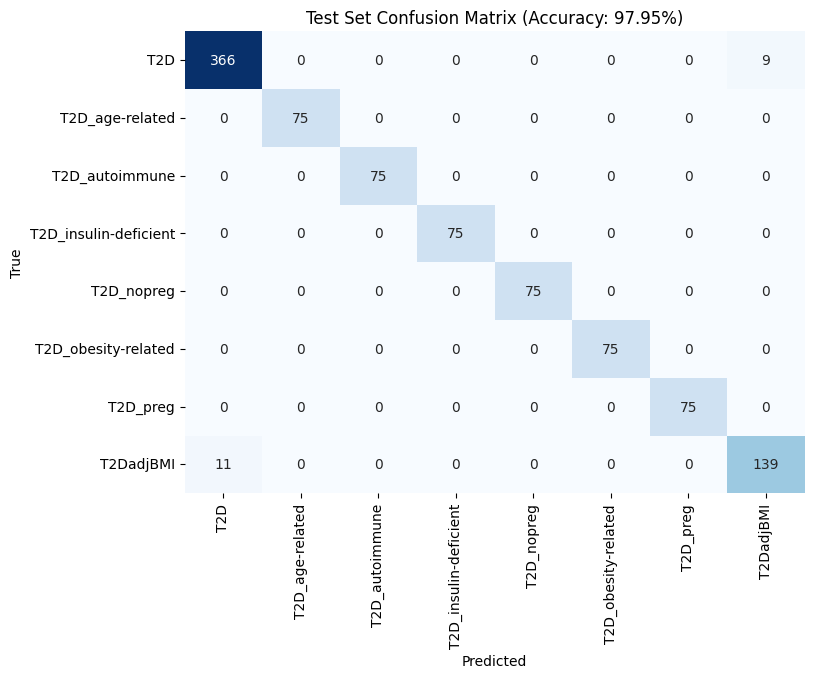

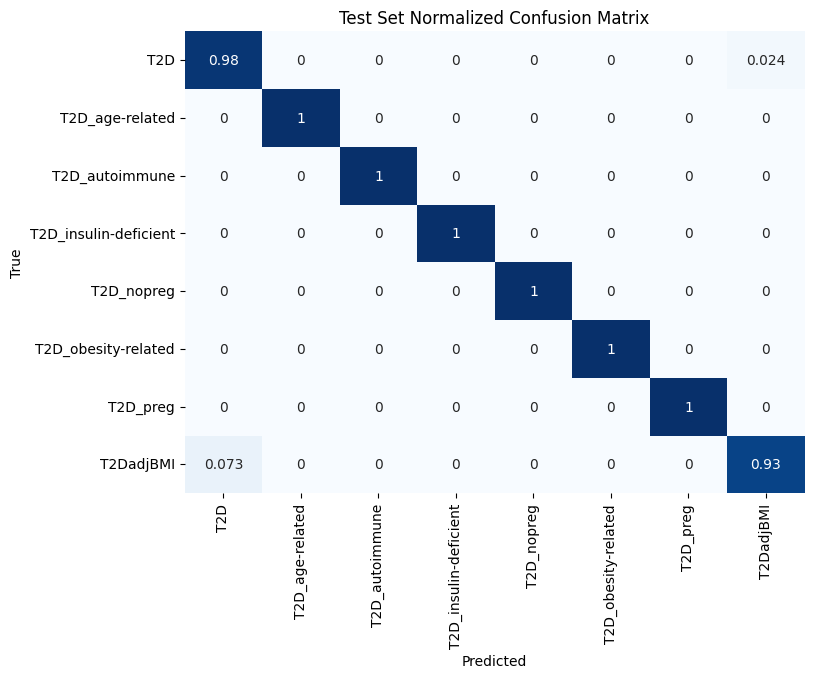

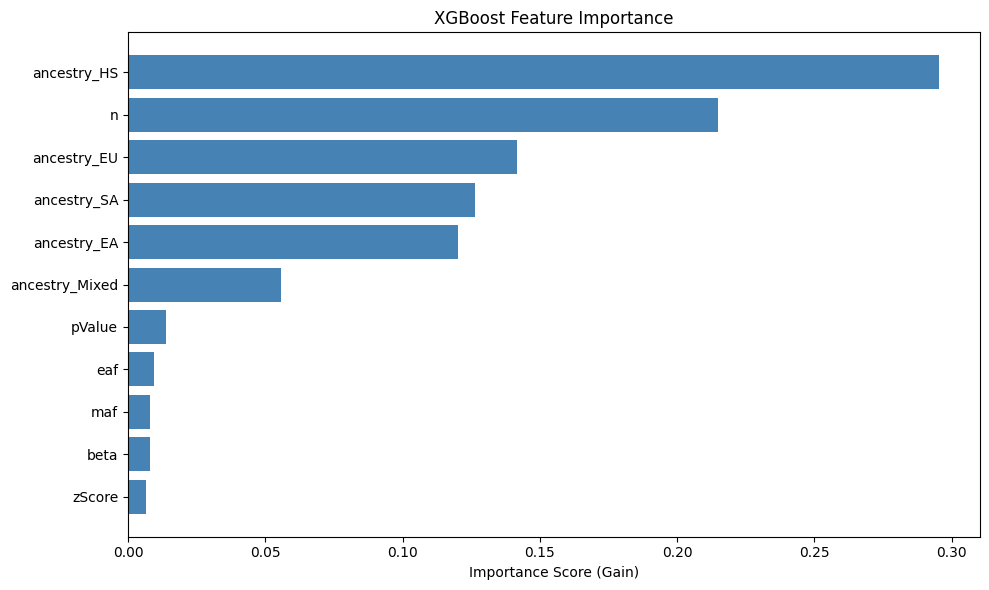

⚠️ SHAP plot skipped due to error: could not convert string to float: '[3.8469994E-1,7.6939985E-2,7.6939985E-2,7.6939985E-2,7.6939985E-2,7.6939985E-2,7.6939985E-2,1.5366015E-1]'


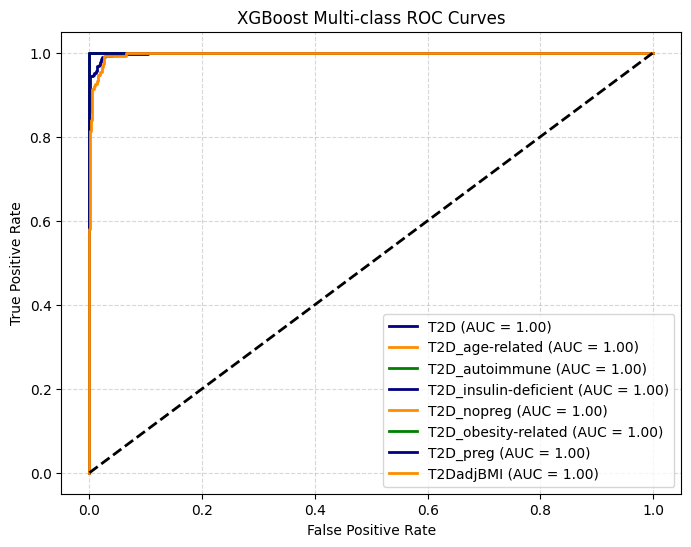

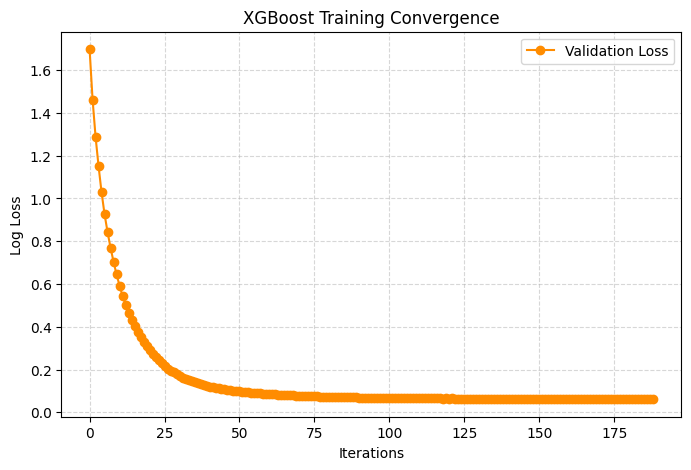


✅ XGBoost Summary:
Validation Accuracy: 0.9723
Test Accuracy: 0.9795
Best Iteration: 168
Best Validation Score: 0.0615


In [26]:
# =========================
# 📦 IMPORTS
# =========================
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_curve,
    auc,
    accuracy_score
)
from sklearn.preprocessing import label_binarize
from itertools import cycle

# =========================
# 🔧 FEATURE CLEANUP
# =========================
numeric_features = ['beta', 'eaf', 'maf', 'pValue', 'zScore', 'n']
df_encoded[numeric_features] = df_encoded[numeric_features].apply(pd.to_numeric, errors='coerce')

selected_features = numeric_features + ancestry_cols
X = df_encoded[selected_features]
y = df_encoded['phenotype_label']

# =========================
# ⚙️ TRAIN XGBOOST
# =========================
xgb_model = xgb.XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='mlogloss',
    use_label_encoder=False,
    early_stopping_rounds=20
)

xgb_model.fit(
    X_train.astype(float), y_train,
    eval_set=[(X_val.astype(float), y_val)],
    verbose=False
)

print("✅ XGBoost training completed!")

# =========================
# 📊 EVALUATION & CONFUSION MATRICES
# =========================
def evaluate_xgb_model(model, X, y, dataset_name="Dataset"):
    X = X.astype(float)
    preds = model.predict(X)
    acc = accuracy_score(y, preds)

    print(f"\n=== {dataset_name} Results ===")
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y, preds, target_names=le.classes_))

    # Confusion Matrix (raw)
    cm = confusion_matrix(y, preds)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=le.classes_, yticklabels=le.classes_,
                cbar=False)
    plt.title(f"{dataset_name} Confusion Matrix (Accuracy: {acc:.2%})")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    # Normalized Confusion Matrix
    cm_norm = confusion_matrix(y, preds, normalize='true')
    plt.figure(figsize=(8,6))
    sns.heatmap(cm_norm, annot=True, cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_,
                cbar=False)
    plt.title(f"{dataset_name} Normalized Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    return preds, acc

# Evaluate
val_preds, val_acc = evaluate_xgb_model(xgb_model, X_val, y_val, "Validation Set")
test_preds, test_acc = evaluate_xgb_model(xgb_model, X_test, y_test, "Test Set")

# =========================
# 🌲 FEATURE IMPORTANCE (Professional)
# =========================
importances = xgb_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.barh(np.array(X.columns)[indices], importances[indices], color='steelblue')
plt.gca().invert_yaxis()
plt.xlabel("Importance Score (Gain)")
plt.title("XGBoost Feature Importance")
plt.tight_layout()
plt.show()

# =========================
# 🧠 SHAP INTERPRETABILITY (Optional)
# =========================
try:
    import shap
    explainer = shap.TreeExplainer(xgb_model, feature_perturbation="tree_path_dependent")
    shap_values = explainer.shap_values(X_val.astype(float))
    shap.summary_plot(shap_values, X_val.astype(float), feature_names=X.columns, show=True)
except Exception as e:
    print("⚠️ SHAP plot skipped due to error:", e)

# =========================
# 📈 MULTI-CLASS ROC CURVES (Professional)
# =========================
y_test_bin = label_binarize(y_test, classes=np.arange(len(le.classes_)))
y_pred_proba = xgb_model.predict_proba(X_test.astype(float))

fpr, tpr, roc_auc = {}, {}, {}
plt.figure(figsize=(8,6))
colors = cycle(['navy', 'darkorange', 'green'])
for i, color in zip(range(len(le.classes_)), colors):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'{le.classes_[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title('XGBoost Multi-class ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# =========================
# 📉 TRAINING CONVERGENCE (LOGLOSS)
# =========================
results = xgb_model.evals_result()
plt.figure(figsize=(8,5))
plt.plot(results['validation_0']['mlogloss'], label='Validation Loss', color='darkorange', marker='o')
plt.xlabel('Iterations')
plt.ylabel('Log Loss')
plt.title('XGBoost Training Convergence')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()

# =========================
# ✅ SUMMARY
# =========================
print(f"\n✅ XGBoost Summary:")
print(f"Validation Accuracy: {val_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Best Iteration: {xgb_model.best_iteration}")
print(f"Best Validation Score: {xgb_model.best_score:.4f}")
